# Ordinary Linear Regression

$\text{Given data }y \text{ satisfying the IID requirement: (Independent and drawn from the Identically same Distribution) } $
$$y = X\beta + e $$
$ X \text{ are the independent variables and } y \text{ are the dependent variables and } \beta \text{ the regression coefficients, and } e \text{ is the error} $

$\text{Writing this out as an example in } (x, y) \text{ space}$
$$\left\{ 
  \begin{aligned}
    y_1 \\ y_2 \\ . \\y_n
  \end{aligned}
  \right\}=
  \begin{bmatrix} 1 & x_{1}  \\ 1 & x_{2}  \\ 1 & x_{3}  \\ ... \\ 1 & x_{n} \end{bmatrix}
  \begin{equation}
\left\{ 
  \begin{aligned}
    \beta_0 \\ \beta_1
  \end{aligned}
  \right\} + e
\end{equation}
$$
$\text{We define a least squares loss function }$
$$ R =\sum |y - X\beta|^{2} $$
$\text{where } y \text{ is the actual data and } X\beta \text{ is the model prediction} $ 
$\text{Linear algebra tells us that } X^T.e = 0 \text{ so multiplying through by } X^T $
$$ X^T X \beta = X^T y $$

$$ \beta = (X^T X)^{-1} X^T y $$



# Variance-Covariance Matrix 
$\text{In many situations the data may not be IID. In this case we define a variance-covariance matrix of the form:}$

$$ \Omega = \sigma^2 \{X\} = \begin{bmatrix} \sigma_{X_0}{^2} & w_{X_0,X_1} & w_{X_0,X_2} & w_{X_0,X_3}.. \\
  w_{X_1,X_0} & \sigma_{X_1}{^2} & w_{X_1,X_2} & w_{X_1,X_2}..\\ w_{X_2,X_0} & w_{X_2,X_1} & \sigma_{X_2}{^2} & w_{X_2,X_3}.. \\  .. \\ w_{X_n,X_0} & w_{X_n,X_1} & .. & \sigma_{X_n}{^2}\end{bmatrix} $$
  $\text{where } \sigma_{X_0}{^2} \text{ is the variance of } X_0 $
  $\text{and } w_{X_0,X_1} \text{ is the covariance of } X_0 \text{ with } X_1 $

$\text{We abbreviate this to : }$

 $$ \Omega =  \begin{bmatrix} \sigma_0^2 & w_{0,1} & w_{0,2} & w_{0,3}.. \\
  w_{1,0} & \sigma_1^2 & w_{1,2} & w_{1,2}..\\ w_{2,0} & w_{2,1} & \sigma_2^2 & w_{2,3}.. \\  .. \\ w_{n,0} & w_{n,1} & .. & \sigma_n^2\end{bmatrix} $$
$ \text{Now since }\Omega \text{ is symmetric and positive definite we can use Cholesky decomposition to write it as follows: }$
  $$\Omega = P P^T $$ 
  $\text{where P is lower triangle }$
   $$ P =  (\Omega)^{1/2}$$
  $\text{As before we note that  }$
  $$ (\Omega)^{-1/2}\Omega   (\Omega^{T})^{-1/2} = I $$




### Example of how we use this

$\text{Let Z be uncorrelated random variables with mean 0 and variance 1}$ 
$$Z \sim N(0,I)$$
$\text{If we transform such that } X = A + P Z$
$\text{The A translates each point and P scales the points so the effect will be to increase the variance.}$

$\text{The mean } \mu = A \text{ and the variance is } PP^T = \Omega $
$$ X \sim N(A,P P^T) = N(A,\Omega)$$

#### So if our job is to create a correlated X with variance Omega we need to find P

$ \text{Where } \Omega \text{ is the variance } $
$ \text{Using Cholesky Decomposition we get } P P^T = \Omega $
$ \text{Its almost as if } P = \Omega^{1/2} = \sqrt\Omega $
$$ \text{Therefore: } P^{-1} \Omega (P^T)^{-1} = I $$

Below using $P$ we can transform uncorrelated data so that it is correlated. So suppose 
$$
  \Omega = \begin{bmatrix} 10 & -3\\ -3 & 1\end{bmatrix} $$

$$ P = \begin{bmatrix} \sqrt(10) & 0\\ -0.95 & 0.31\end{bmatrix} \\ 
P^T = \begin{bmatrix} \sqrt(10) & -0.95\\ 0 & 0.31\end{bmatrix}$$


#### To create correlated data 
$ \text{Given uncorrelated data length n, } x_i \text{ and } x_j $
$$ y = P x $$ 
$$y_i \text{ and } y_j \text{ will be correlated} $$ 


$\text{We can uncorrelate the data again using } P^{-1} $
$$ \hat{x} = P^{-1}y = P^{-1} P x = x $$
#### Later we will see this transform used in General Least Squares to remove spatial correlation and heteroskedasticity





1.7320508075688772
covariance y :  [[10.46881093 -3.2062311 ]
 [-3.2062311   1.07658171]]
covrecovered:  [[ 1.04688109 -0.06558782]
 [-0.06558782  0.95036034]]


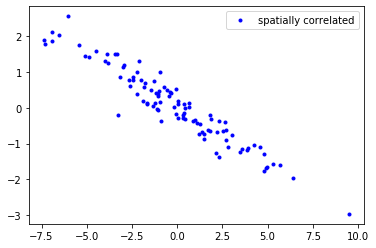

In [1]:
# Demo: Using Cholesky to remove autocorrelation of variables
# First we use C.T to create correlated variables
# Then we use C and R(-1) to uncorrelate them
"""Example of generating correlated normally distributed random samples."""

import numpy as np
from scipy.linalg import eigh, cholesky
from scipy.stats import norm
import matplotlib.pyplot as plt
from pylab import plot, show, axis, subplot, xlabel, ylabel, grid

print(np.sqrt(3))
# Choice of cholesky or eigenvector method.
method = 'cholesky'
#method = 'eigenvectors'

num_samples = 100

# The desired covariance matrix.
r = np.array([
        [ 10,  -3 ],
        [ -3,  1 ]
    ])
# note that the inverse is rinv = np.linalg.inv(r) 

# Generate samples from three independent normally distributed random
# variables (with mean 0 and std. dev. 1).
x = norm.rvs(size=(2, num_samples))

#print('x: ',x)

# We need a matrix P for which P*P^T = r
# Compute the Cholesky decomposition.
P = cholesky(r, lower=True)
#print('chol: ',P)
#print('omega: ',np.dot(P,P.T))
# Convert the data to correlated random variables. 
y = np.dot(P, x)
print('covariance y : ',np.cov(y))

Pinv = np.linalg.inv(P)

# this should be cov = [[1,0],[0,1]]
yy = np.dot(Pinv,y )

print('covrecovered: ',np.cov(yy))
#
# Plot various projections of the samples.
#
plt.figure()
#plot(x[0],x[1], 'g.', label = 'uncorrelated')
plot(y[0], y[1], 'b.',label='spatially correlated')


#plot(yy[0],yy[1],'r.', label='recovered uncorrelated')
#print('un: ',yy)


plt.legend();
show()

# Regression on Well Productivity

$$\{Y\} = [X]\{\beta\}  $$
#### This regression can be solved for all the wells in the basin where spatial location is ignored
$\text{ Where Y is the well productivity and each row of X is the properties of the well
eg lateral length, water volume and proppant mass} $
$$\left\{ 
  \begin{aligned}
    Y_1 \\ Y_2 \\ . \\Y_n
  \end{aligned}
  \right\}=
  \begin{bmatrix} 1 & x_{1,len} & x_{1,water} & x_{1,pmass} \\ 1 & x_{2,1} & x_{2,2} & x_{2,3}  \\ 1 & x_{3,1} & x_{3,2} & x_{3,3} \\ ... \\ 1 & x_{n,1} & x_{n,2} & x_{n,3}\end{bmatrix}
  \begin{equation}
\left\{ 
  \begin{aligned}
    \beta_0 \\ \beta_1 \\ \beta_2 \\ \beta_3
  \end{aligned}
  \right\}
\end{equation}
$$
$ \text{ The solution can be written } $
$$ \begin{equation}
\{\beta\} = \left([X]^T[X]\right)^{-1}  [X]^T [Y] 
\end{equation} $$
#### This regression can also be solved for all the wells in the basin and include location eg county

$$\left\{ 
  \begin{aligned}
    Y_1 \\ Y_2 \\ . \\Y_n
  \end{aligned}
  \right\}=
  \begin{bmatrix} 1 & x_{1,len} & x_{1,wvol} & x_{1,pmass} & x_{1,county}\\ 1 & x_{2,1} & x_{2,2} & x_{2,3} & x_{2,4}  \\ 1 & x_{3,1} & x_{3,2} & x_{3,3}& x_{3,4} \\ ... \\ 1 & x_{n,1} & x_{n,2} & x_{n,3} & x_{n,4}\end{bmatrix}
  \begin{equation}
\left\{ 
  \begin{aligned}
    \beta_0 \\ \beta_1 \\ \beta_2 \\ \beta_3 \\ \beta_4
  \end{aligned}
  \right\}
\end{equation}
$$
#### An x, y  location can be included by using 𝑒𝑎𝑠𝑡𝑖𝑛𝑔, 𝑛𝑜𝑟𝑡ℎ𝑖𝑛𝑔 from some base point 
$$ x = a * 10000 \\ y = b * 10000 $$
$$\left\{ 
  \begin{aligned}
    Y_1 \\ Y_2 \\ . \\Y_n
  \end{aligned}
  \right\}=
  \begin{bmatrix} 1 & x_{1,len} & x_{1,wvol} & x_{1,pmass} & x_{1,xloc} & x_{1,yloc}\\ 1 & x_{2,1} & x_{2,2} & x_{2,3} & x_{2,4} & x_{2,5}  \\ 1 & x_{3,1} & x_{3,2} & x_{3,3}& x_{3,4} & x_{3,5} \\ ... \\ 1 & x_{n,1} & x_{n,2} & x_{n,3} & x_{n,4} & x_{n,5}\end{bmatrix}
  \begin{equation}
\left\{ 
  \begin{aligned}
    \beta_0 \\ \beta_1 \\ \beta_2 \\ \beta_3 \\ \beta_4 \\ \beta_5
  \end{aligned}
  \right\}
\end{equation}
$$
#### In the actual study an even more accurate location was include using a 2nd order polynomial 

### Radial Basis Functions

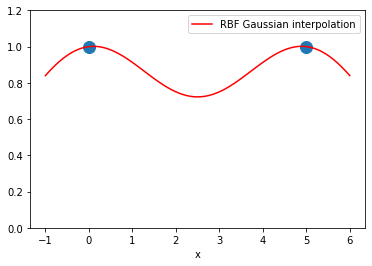

In [164]:
##### import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt
from scipy.interpolate.rbf import Rbf  # radial basis functions
from scipy.stats import gaussian_kde

coords = np.linspace(0, 5, 2)
values = np.ones_like(coords)

x_fine = np.linspace(-1, 6, 101)

rbf_interpolation = Rbf(coords, values, function='gaussian') # returns a function

interpolated_y = rbf_interpolation(x_fine)  # this will interpolate at x_fine points

kernel_density_estimation = gaussian_kde(coords)

plt.figure()
plt.plot(coords, values, 'o', markersize=12)
plt.plot(x_fine, interpolated_y, '-r', label='RBF Gaussian interpolation')
#plt.plot(x_fine, kernel_density_estimation(x_fine), '-b', label='kernel density estimation')
plt.ylim(0,1.2) 
plt.legend(); plt.xlabel('x')
plt.show()

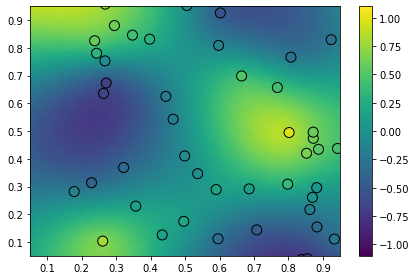

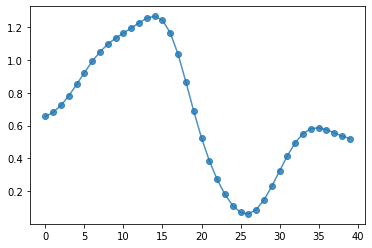

In [64]:
from scipy.interpolate import Rbf

epsilon = 3
r = 2
types = {'multiquadric': np.sqrt((r/epsilon)**2 + 1),
         'inverse': 1.0/np.sqrt((r/epsilon)**2 + 1),
         'gaussian': np.exp(-(r/epsilon)**2),
         'linear': r,
         'cubic': r**3,
         'quintic': r**5,
         'thin_plate': r**2 * np.log(r)}
x, y, z, d = np.random.rand(4, 50)
rbfi = Rbf(x, y, z, d)  # radial basis function interpolator instance
xi = yi = zi = np.linspace(0, 1, 40)
di = rbfi(xi, yi, zi)   # interpolated values
di.shape
plt.plot(di,'o-',alpha=0.8)

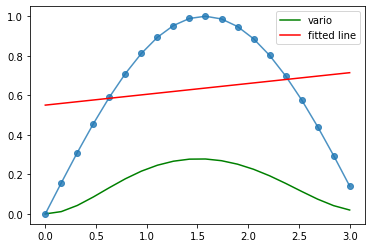

In [64]:
import scipy.stats as stats
from scipy.interpolate import Rbf
def variogram(h,x,y):  # is the distance expressed as index
    len = x.size
    v = []
    for i in range(len-h):
        v.append(1 - np.exp(-(y[i] - y[i+h])*(y[i] - y[i+h])))
    #print(sum(v)/(len-h))
    return sum(v)/(len-h)
       
x = np.linspace(0, 3, 20)
func = lambda x : np.sin(x)
y = func(x)
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
e = y - (intercept + slope * x)
vario = []
for i in range(0,x.size):
    #print('lag:',i)
    vario.append(variogram(i,x,y))
plt.plot(x,vario, 'g', label = 'vario')
plt.plot(x,y,'o-',alpha=0.8)
plt.plot(x, intercept + slope*x, 'r', label='fitted line')


plt.legend()
plt.show()

### Moran's Index - we need to specify weights according to rbf
$$ I =   \frac{n}{(\sum_i \sum_j w_{i,j})} \frac { \sum_i \sum_j w_{i,j}( \epsilon_i - \mu ) * ( \epsilon_j - \mu ) } { 
 \sum_i( \epsilon_i - \mu ) * ( \epsilon_i - \mu ) } $$
 where $\epsilon_i$ is error (residual) and $\mu$ is the mean, and $w_{i,j}$ are weights

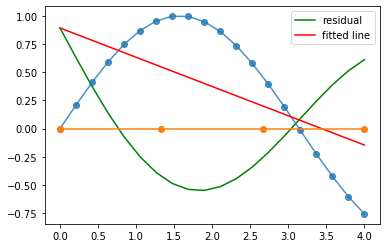

mean: 5.551115123125783e-18
a: 0.3727458866563573
denom: 3.873724529555505
Moran: 0.09622415941360922


In [192]:
#  Moran's Index - we should specify weights w by rbf 
import scipy.stats as stats
from scipy.interpolate import Rbf
xpan = 4
x = np.linspace(0, xpan, 20)
func = lambda x : np.sin(x)
y = func(x)
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
residual = (intercept + slope * x) - y

plt.plot(x,residual, 'g', label = 'residual')
plt.plot(x,y,'o-',alpha=0.8)
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
xx = np.linspace(0, xpan, 4)
yy = xx*0
plt.plot(xx,yy, 'o-')
plt.legend()
plt.show()
def moran(res):
    n = res.size
    w = 1.0
    mean = sum(res)/n
    print('mean:',mean)
    a = denom = wtotal = 0.
    for i in range(n):
        denom += (res[i]-mean)*(res[i]-mean)
        for j in range(n):
            w = 1
            if(i != j):
                w = 0
            a = w*(res[i]-mean)*(res[j]-mean)
            wtotal += w
    index = (n*a)/(denom*wtotal)
    print('a:',a)
    print("denom:",denom)
    return index


print('Moran:',moran(residual))


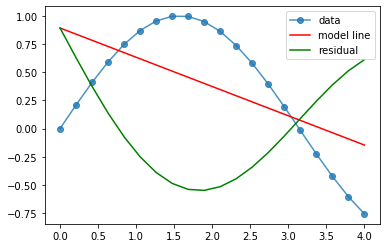

In [10]:
# Ordinary Linear Regression
import scipy.stats as stats
from scipy.interpolate import Rbf
xpan = 4
x = np.linspace(0, xpan, 20)
func = lambda x : np.sin(x)
y = func(x)
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
residual = (intercept + slope * x) - y

plt.plot(x,y,'o-',alpha=0.8, label='data')
plt.plot(x, intercept + slope*x, 'r', label='model line')
plt.plot(x,residual, 'g', label = 'residual')
xx = np.linspace(0, xpan, 4)
yy = xx*0
#plt.plot(xx,yy, '-')
plt.legend()
plt.show()



### Ordinary Linear Regression
#### Suppose we have n data points (x, y) 
In general we cannot fit a line through all the points 
$$ y = \beta_0 + \beta_1 x $$

However, we can fit a line optimizing so the least square error is minimum




$$\left\{ 
  \begin{aligned}
    y_0 \\ y_1 \\ . \\y_n
  \end{aligned}
  \right\}=
  \begin{bmatrix} 1 & x_{0}  \\ 1 & x_{1}   \\ 1 & x_{2}  \\ ... \\ 1 & x_{n} \end{bmatrix}
  \begin{equation}
\left\{ 
  \begin{aligned}
    \beta_0 \\ \beta_1 
  \end{aligned}
  \right\}
\end{equation}
$$


$$\{Y\} = [X]\{\beta\} +\epsilon $$

$\text{we know from linear algebra that } [X]^T\epsilon = 0$

$$ X^T Y = [X]^T[X]\{\beta\} $$

$ \text{ The solution can be written } $
$$ \begin{equation}
\{\beta\} = \left([X]^T[X]\right)^{-1}  [X]^T [Y] 
\end{equation} $$

We know this is an approximate solution so lets include the error as $u$
$$ \begin{equation}
\{\beta\} = \left([X]^T[X]\right)^{-1}  [X]^T [Y] + u
\end{equation} $$

Now we might assume that the errors are normally distributed with a mean of zero so we can write

$ u = N(0,\Sigma) $ where $\Sigma$ is the variance-covariance matrix of the residuals (errors)

### Example Transformation with diagonal Omega Matrix - 
Let $\hat{y} = P^{-1}y$

$$ \left\{ 
\begin{aligned}
    \hat{y_0} \\ \hat{y_1} \\ \hat{y_2} \\.. \\ \hat{y_n}
\end{aligned} \right\} =
\begin{bmatrix} \frac{1}{\sigma_0} & 0 & 0 & 0.. \\
  0 & \frac{1}{\sigma_1} & 0 & 0..\\ 0 & 0 & \frac{1}{\sigma_2} & 0.. \\  .. \\  0 & 0 & .. & \frac{1}{\sigma_n} \end{bmatrix} 
  \left\{ 
\begin{aligned} y_0 \\ y_1 \\ y_2 \\ ..\\ y_n 
\end{aligned} \right \} = 
\left\{ 
\begin{aligned} 
y_0/ \sigma_0  \\ y_1/\sigma_1 \\ y_2/\sigma_2 \\ ..\\ y_n / \sigma_n
\end{aligned} \right\}
$$
$$\hat{X} =  P^{-1} \begin{bmatrix} 1 & X_0 \\
  1 & X_1\\ 1 & X_2  \\  .. \\  1 & X_n\end{bmatrix} =
   \begin{bmatrix} 1/\sigma_0 & X_0/\sigma_0 \\
  1/\sigma_1 & X_1 / \sigma_1\\ 1/\sigma_2 & X_2/\sigma_2  \\  .. \\  1/\sigma_n & X_n/\sigma_n \end{bmatrix}
$$
This is just a scaled version of our regression equation but with better properties

So we now can solve 
$$ \hat{X}^T \hat{X} \hat{\beta} = \hat{X}^T \hat{y} $$

$$ \hat{\beta} = (\hat{X}^T \hat{X})^{-1} \hat{X}^{T}\hat{y} + v $$ 

substituting for $\hat{X} = P^{-1}X $

$$ \hat{\beta} = ( (P^{-1}X)^T  P^{-1}X ) ^{-1}   (P^{-1}X)^{T}  P^{-1}y + v $$ 

$$ \hat{\beta} = (X^T (P^{-1})^T  P^{-1}X )^{-1}   X^T (P^{-1})^T   P^{-1}y + v $$

$$ \hat{\beta} = (X^T \Omega^{-1} X )^{-1}   X^T \Omega^{-1}y + v $$
You can show that the expected value ($\mu$) of $\hat{\beta} = \beta$
The variance is $var \hat{\beta} = (X^T \Omega^{-1} X)^{-1} $

#### This is a BLUE estimator (Best Linear Unbiased Estimator)

### Spatial Autocorrelation in Generalized Linear Regression (GLR)
As before we write our GLS equation with an error term u
$$  y = X \beta + u $$
Now however our u term is spatially autocorrelated and is therefore of the form
 $$ \Omega =  \begin{bmatrix} \sigma_0^2 & w_{0,1} & w_{0,2} & w_{0,3}.. \\
  w_{1,0} & \sigma_1^2 & w_{1,2} & w_{1,2}..\\ w_{2,0} & w_{2,1} & \sigma_2^2 & w_{2,3}.. \\  .. \\ w_{n,0} & w_{n,1} & .. & \sigma_n^2\end{bmatrix} $$
$ \text{Now since }\Omega \text{ is symmetric and positive definite we can use Cholesky decomposition to write it as follows: }$
  $$\Omega = P P^T $$ 
  $\text{where P is lower triangle }$
   $$ P =  (\Omega)^{1/2}$$
  $\text{As before we note that  }$
  $$ (\Omega)^{-1/2}\Omega   (\Omega^{T})^{-1/2} = I $$

#### Now we can still transform our original regression problem

$\text{Let } \hat{y} = P^{-1}y $


$$\hat{X} =  P^{-1} X $$
This is the scaled version of our regression equation 

And we can solve this as before  
$$ \hat{X}^T \hat{X} \hat{\beta} = \hat{X}^T \hat{y} $$

$$ \hat{\beta} = (\hat{X}^T \hat{X})^{-1} \hat{X}^{T}\hat{y} + v $$ 

substituting for $\hat{X} = P^{-1}X $

$$ \hat{\beta} = ( (P^{-1}X)^T  P^{-1}X ) ^{-1}   (P^{-1}X)^{T}  P^{-1}y + v $$ 

$$ \hat{\beta} = (X^T (P^{-1})^T  P^{-1}X )^{-1}   X^T (P^{-1})^T   P^{-1}y + v $$

$$ \hat{\beta} = (X^T \Omega^{-1} X )^{-1}   X^T \Omega^{-1}y + v $$
You can show that the expected value ($\mu$) of $\hat{\beta} = \beta$
The variance is $var \hat{\beta} = (X^T \Omega^{-1} X)^{-1} $

### This is Generalized Linear Regression 
#### This is a BLUE estimator (Best Linear Unbiased Estimator)

### Repeat of Generalized Linear Regression with some different emphasis
Consider a radial basis function of the form 


We define a loss function 
$$ R = |y - X\beta|^{2} $$

$$ X^T X \beta = X^T y $$

$$ \beta = (X^T X)^{-1} X^{T}y + u $$ 
where $u$ is the error and we assume the error is normally distributed with $\mu=0$
$$var(\beta) = \frac{1}{n-2}\sum{(y - X\beta)^T (y - X\beta)}$$
$$var(\beta) = (X^T X)^{-1} X^{T}\Omega X(X^T X)^{-1} $$
If we look at the $\Omega$ matrix we see that the variance varies so our solution is called "heteroskedactic" which just means the variance is not the same for all data points

 $$ \Omega =  \begin{bmatrix} \sigma_0^2 & 0 & 0 & 0.. \\
  0 & \sigma_1^2 & 0 & 0..\\ 0 & 0 & \sigma_2^2 & 0.. \\  .. \\  0 & 0 & .. & \sigma_n^2\end{bmatrix}$$
  Now assume we can write $\Omega = P P^T $ then it follows 
   $$ P =  \begin{bmatrix} \sigma_0 & 0 & 0 & 0.. \\
  0 & \sigma_1 & 0 & 0..\\ 0 & 0 & \sigma_2 & 0.. \\  .. \\  0 & 0 & .. & \sigma_n\end{bmatrix}$$
  and that
  $$ P^{-1}\Omega (P^T)^{-1} = I $$
  
  So now we find a mathematical convenient transformation. We note that if we transform our errors by letting $v = P^{-1}u $
 
 We then get the following variance 
 $$var(P^{-1}u) = P^{-1}var(u) (P^T)^{-1} =P^{-1}\Omega (P^T)^{-1} = I  $$
 
 This means the variance is one everywhere ie it is "homoskedactic" and not "heteroskedactic"
 So now lets tranform our original problem. 

### Dealing with Spatial Autocorrelation using Generalized Linear Regression (GLR)
As before we write our GLS equation with an error term u
$$  y = X \beta + u $$
Now however our u term is spatially autocorrelated and is therefore of the form
 $$ \Omega =  \begin{bmatrix} \sigma_0^2 & w_{0,1} & w_{0,2} & w_{0,3}.. \\
  w_{1,0} & \sigma_1^2 & w_{1,2} & w_{1,2}..\\ w_{2,0} & w_{2,1} & \sigma_2^2 & w_{2,3}.. \\  .. \\ w_{n,0} & w_{n,1} & .. & \sigma_n^2\end{bmatrix} $$
$ \text{Now since }\Omega \text{ is symmetric and positive definite we can use Cholesky decomposition to write it as follows: }$
  $$\Omega = P P^T $$ 
  $\text{where P is lower triangle }$
   $$ P =  (\Omega)^{1/2}$$
  $\text{As before we note that  }$
  $$ (\Omega)^{-1/2}\Omega   (\Omega^{T})^{-1/2} = I $$

#### Now we can still transform our original regression problem

$\text{Let } \hat{y} = P^{-1}y $


$$\hat{X} =  P^{-1} X $$
This is the scaled version of our regression equation 

And we can solve this as before  
$$ \hat{X}^T \hat{X} \hat{\beta} = \hat{X}^T \hat{y} $$

$$ \hat{\beta} = (\hat{X}^T \hat{X})^{-1} \hat{X}^{T}\hat{y} + v $$ 

substituting for $\hat{X} = P^{-1}X $

$$ \hat{\beta} = ( (P^{-1}X)^T  P^{-1}X ) ^{-1}   (P^{-1}X)^{T}  P^{-1}y + v $$ 

$$ \hat{\beta} = (X^T (P^{-1})^T  P^{-1}X )^{-1}   X^T (P^{-1})^T   P^{-1}y + v $$

$$ \hat{\beta} = (X^T \Omega^{-1} X )^{-1}   X^T \Omega^{-1}y + v $$

#### This is a BLUE estimator (Best Linear Unbiased Estimator) 
#### You can show that the expected value 
$$ \hat{\beta} = \beta  $$

The variance is
$$var \hat{\beta} = (X^T \Omega^{-1} X)^{-1} $$

$\text{If we use a least squares approach we have:}$
$$ R = || y - \hat{y}||^2 = || y - \hat{X} \hat{\beta}||^2 $$

### Radial Basis Function can be used to calculate Omega
Consider a radial basis function of the form 

$$ \phi_k =  \mathrm{e}^\frac{||(x - x_k)||^2}{2 \sigma } $$

$$f(x) = \sum_k\{\beta_k *\phi(x - x_k) \}  $$

We define a loss function 
$$ R = |y - X\beta|^{2} $$

$$ X^T X \beta = X^T y $$

$$ \beta = X^{-1}y $$

where $\phi_k(x) $ means the translate of $\phi$ to point $k$ evaluated at point $x$ ie $\phi(x - k)$

$$\left\{ 
  \begin{aligned}
    Y_0 \\ Y_1 \\ . \\Y_n
  \end{aligned}
  \right\}=
  \begin{bmatrix} \phi_{0}(x_0) & \phi_{1}(x_0) & \phi_{2}(x_0) & .. \\
  \phi_{0}(x_1) & \phi_{1}(x_1) & \phi_{2}(x_1) & ..\\ \phi_{0}(x_2) & \phi_{1}(x_2) & \phi_{2}(x_2) & .. \\ \phi_{0}(x_3) & \phi_{1}(x_3) & \phi_{2}(x_3) & .. \\ ... \\ \phi_{0}(x_4) & \phi_{1}(x_4) & \phi_{2}(x_4) & ..\end{bmatrix}
\begin{equation}
\left\{ 
  \begin{aligned}
    \theta_0 \\ \beta_1 \\ \beta_2 \\ \beta_3 \\ \beta_4
  \end{aligned}
  \right\}
\end{equation}
$$
Note that the columns are given by a rbf $\phi(x)$ evaluated at various $x$
This can be expressed as 
$$\{ Y \} = [X]\{\beta \}$$



$$ Q = 
\begin{bmatrix} \phi_{0}(x_0) & \phi_{1}(x_0) & \phi_{2}(x_0) & .. \\
\phi_{0}(x_1) & \phi_{1}(x_1) & \phi_{2}(x_1) & ..\\ \phi_{0}(x_2) & \phi_{1}(x_2) & \phi_{2}(x_2) & .. \\ \phi_{0}(x_3) & \phi_{1}(x_3) & \phi_{2}(x_3) & .. \\ ... \\  \phi_{0}(x_4) & \phi_{1}(x_4) & \phi_{2}(x_4) & .. \end{bmatrix}$$

solving for $ \beta $
$$\{ \beta \} = [X]^{-1}\{ y \}$$


### Regularization 
$\text{The Generalized Linear Regression equation is:}$

$$ \hat{\beta} = (X^T \Omega^{-1} X )^{-1}   X^T \Omega^{-1}y + v $$

$\text{We can solve using linear algebra but often we minimize a loss function}$


$\text{The associated loss function that is minimized is of the form:}$
$$ R = |\hat{y} - \hat{X} \hat{\beta}|^{2} $$

$\text{However, we can add a regularization term: }$
$$ R = \sum(|\hat{y} - \hat{X} \hat{\beta}|^{2}) + \lambda \sum (|\hat\beta|^{2}) $$

$\text{The one below is called Lasso Regularization: }$

$$ R = \sum(|\hat{y} - \hat{X} \hat{\beta}|^{2}) +\lambda \sum|\hat\beta| $$

$$ (\sum_i |\beta_i|^p)^{1/p} $$

$$ ||\beta_i||_p=const $$

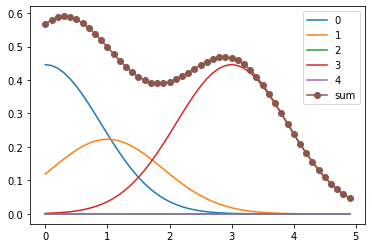

In [49]:
# This illustrates Radial Basis Function representation data on [0,5]
# The values will create a basis function with that value
# We sum them up to show correlation of spatial points

from numpy.linalg import inv
import scipy.stats as stats
from scipy.interpolate import Rbf
n = 5    # number of shifts of phi
xlen = 5
x = np.linspace(0, xlen, n, endpoint=False)
xfine = np.linspace(0, xlen, n*10, endpoint=False)
values = np.ones_like(x)
values = [1, .5, 0, 1, 0]

rbf = Rbf(x, values,epsilon=1)
fi = rbf(xfine)
#plt.plot(xfine,fi)
Q = np.empty((n,n))
Tot = []
for i in range(n):
    stride = i
    y = values[i]* stats.multivariate_normal.pdf(xfine, mean=stride, cov=0.8)  # this give value of phi(i) at 0,1,2 etc
    Tot.append(y)  #    Q[i] = y    # this is first column - for now we store it as a row since its symmetric
    plt.plot(xfine, y, label = i)
t = np.sum(Tot, axis = 0)
#print('Q:',Q)
#QT = Q.T        # transpose array - its symmetric so its exactly the same as Q
#Qinv = inv(QT)  # calculate inverse of Q 
#theta = Qinv.dot(values)
#print('theta:',theta)
#newData = Q.dot(theta)
#plt.plot(x,newData,'o-', label='interpolated')
plt.plot(xfine,t,'o-', label='sum')
plt.legend()
plt.show()

theta: [0.78622865 2.70502508 3.57411735 1.33664169 2.76359018]


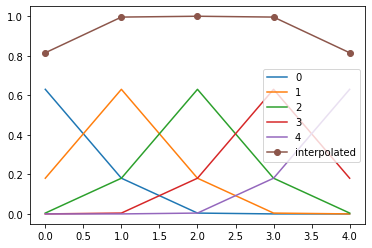

In [45]:
# This illustrates Radial Basis Function representation data on [0,5]
# Test data = [1, 2, 3, 2, 1]
data = [1, 2.5, 3, 2, 2]
from numpy.linalg import inv
n = 5    # number of shifts of phi
x = np.linspace(0, 5, n, endpoint=False)
Q = np.empty((n,n))
Tot = []
for i in range(n):
    y = stats.multivariate_normal.pdf(x, mean=i, cov=0.4)  # this give value of phi(i) at 0,1,2 etc

    Q[i] = y    # this is first column - for now we store it as a row since its symmetric
    plt.plot(x, y, label = i)


#print('Q:',Q)
QT = Q.T        # transpose array - its symmetric so its exactly the same as Q
Qinv = inv(QT)  # calculate inverse of Q 
theta = Qinv.dot(data)
print('theta:',theta)
newData = Q.dot(theta)
plt.plot(x,t,'o-', label='interpolated')
plt.legend()
plt.show()

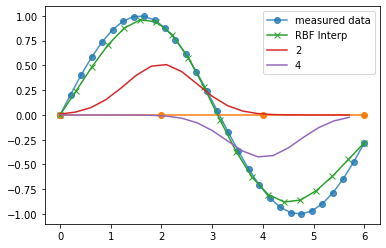

In [168]:
import scipy.stats as stats
from scipy.interpolate import Rbf

x = np.linspace(0, 6, 30)
func = lambda x : np.sin(x)
y = func(x)
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
e = y - (intercept + slope * x)

plt.plot(x,y,'o-',alpha=0.8, label='measured data')


#  use radial basis functions for interpolation
xi = np.linspace(0, 6, 20)
xx = np.linspace(0, 6, 4)
yy = xx*0
plt.plot(xx,yy, 'o-')
yy = func(xx)
rbf = Rbf(xx, yy,epsilon=2)

fi = rbf(xi)
plt.plot(xi,fi,'x-',label='RBF Interp')
x = np.linspace(0, 6, 20, endpoint=False)
y = func(2)*stats.multivariate_normal.pdf(x, mean=2, cov=0.5); 
plt.plot(x, y, label = '2')
y = func(4) * stats.multivariate_normal.pdf(x, mean=4, cov=0.5); 
plt.plot(x, y, label = '4')
plt.legend()
plt.show()

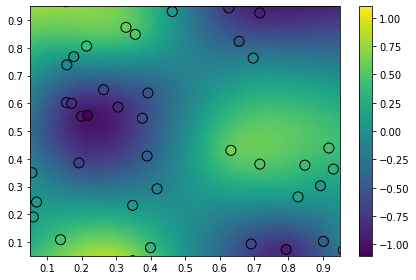

In [165]:
''' 
In this example we generate synthetic scattered data with added noise
and then fit it with a smoothed RBF interpolant. The interpolant in
this example is equivalent to a thin plate spline.
'''
import numpy as np
from rbf.interpolate import RBFInterpolant
import matplotlib.pyplot as plt
from datetime import datetime

# np.random.seed(3) uncomment to get same random numbers every time
N = 100
npoint = 50
# observation points
x_obs = np.random.random((npoint, 2)) 
# values at the observation points
u_obs = np.sin(2*np.pi*x_obs[:, 0])*np.cos(2*np.pi*x_obs[:, 1]) 
u_obs += np.random.normal(0.0, 0.1, npoint)
# create a thin-plate spline interpolant, where the data is assumed to
# be noisy
I = RBFInterpolant(x_obs, u_obs, sigma=0.1, phi='phs2', order=1)
# create the interpolation points, and evaluate the interpolant
x1, x2 = np.linspace(0, 1, N), np.linspace(0, 1, N)

x_itp = np.reshape(np.meshgrid(x1, x2), (2, N*N)).T
u_itp = I(x_itp) 
# plot the results
plt.tripcolor(x_itp[:, 0], x_itp[:, 1], u_itp, vmin=-1.1, vmax=1.1, cmap='viridis')
plt.scatter(x_obs[:, 0], x_obs[:, 1], s=100, c=u_obs, vmin=-1.1, vmax=1.1,
            cmap='viridis', edgecolor='k')
plt.xlim((0.05, 0.95))
plt.ylim((0.05, 0.95))
plt.colorbar()
plt.tight_layout()
plt.savefig('interpolate.a.png')
plt.show()


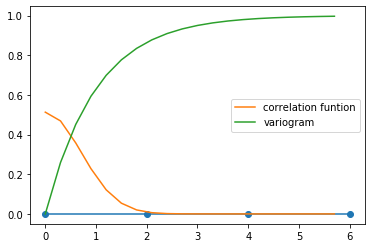

In [217]:
#  Variogram - usually proportional to exp(-(x - x0)*(x - x0)/(r*r))
import scipy.stats as stats
from scipy.interpolate import Rbf
def variogram(x):
    d = 1
    y = 1 - np.exp(-d*x)
    
    return y
xi = np.linspace(0, 6, 40)
xx = np.linspace(0, 6, 4)
yy = xx*0
plt.plot(xx,yy, 'o-')
yy = func(xx)
rbf = Rbf(xx, yy,epsilon=2)

fi = rbf(xi)
#plt.plot(xi,fi,'x-',label='RBF Interp')

x = np.linspace(0, 6, 20, endpoint=False)
y = func(2)*stats.multivariate_normal.pdf(x, mean=0, cov=0.5); 
plt.plot(x,y,'-',label='correlation funtion')
plt.plot(x,variogram(x),'-',label='variogram')
plt.legend()
plt.show()


